In [1]:
#importing
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `t

2.5.1
0.20.1


In [2]:
#preparing the dataset and gathering information
from torchvision import transforms

# define transforms once
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
#visualizing our data
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

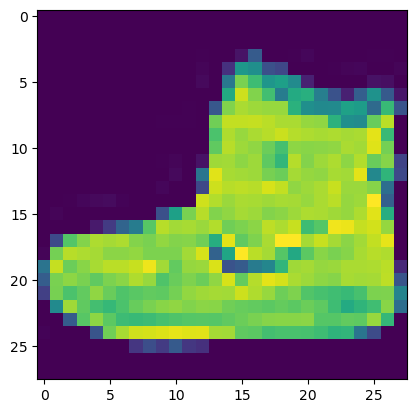

In [8]:
plt.imshow(image.squeeze())

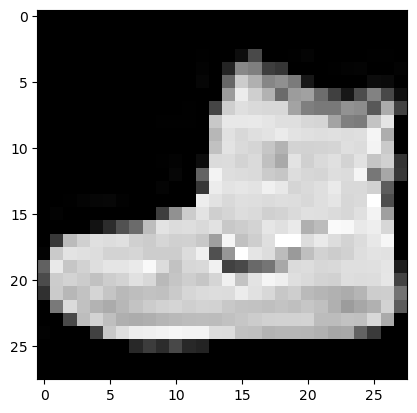

In [9]:
plt.imshow(image.squeeze(), cmap='gray')

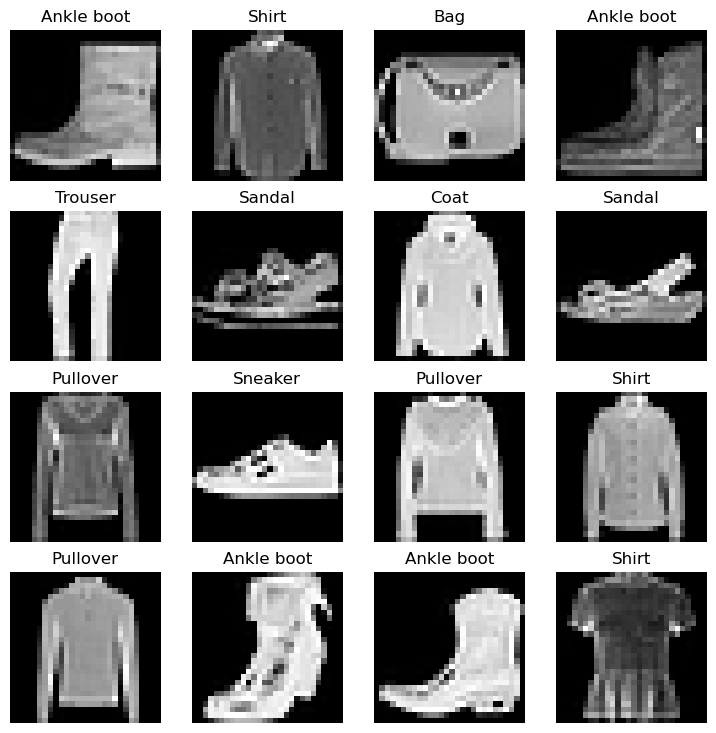

In [10]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)


In [11]:
#preparing dataloader

from torch.utils.data import DataLoader

BATCH_SIZE = 64

train_dataloader = DataLoader(dataset = train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset = test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x30573cad0>,
 <torch.utils.data.dataloader.DataLoader at 0x3198dc3d0>)

In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [13]:
#creating a baseline

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)
output.shape, x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [14]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [15]:
#model creation

from torch import nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to('cpu')

In [17]:
dummy_x = torch.rand([1,1,28,28])
model(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
from helper_functions import accuracy_fn

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-3)

In [20]:
#creating a function to time our experiments

from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = None):
    total_time = end-start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

start_timer = timer()
end_timer = timer()
print_train_time(start=start_timer, end=end_timer, device='cpu')

Train time on cpu: 0.000 seconds


7.624999852851033e-06

In [21]:
#importing progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_loss = 0
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to('cpu'), y.to('cpu')
        y_pred = model(X)
        loss = criterion(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if batch % 400 == 0:
        print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to('cpu'), y_test.to('cpu')
            test_pred = model(X_test)
            test_loss += criterion(test_pred, y_test).item()
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f'Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}')

train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(
    start=train_time_start_on_cpu, 
    end=train_time_end_on_cpu, 
    device=str(next(model.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 2.1323 | Test Loss: 1.9524 | Test Accuracy: 49.0844
Epoch: 1
Train Loss: 1.7420 | Test Loss: 1.5424 | Test Accuracy: 62.2811
Epoch: 2
Train Loss: 1.3675 | Test Loss: 1.2358 | Test Accuracy: 64.2416
Train time on cpu: 8.125 seconds


In [22]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn,):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, "model_loss": loss.item(), "model_accuracy": acc}

model_results = eval_model(model=model, data_loader=test_dataloader, loss_fn=criterion, accuracy_fn=accuracy_fn)
model_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.235844612121582,
 'model_accuracy': 64.24164012738854}

In [23]:
#setting up device agnostic code

device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [24]:
#building a second model

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input: int, hidden: int, output: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=output)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [25]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV2(input=784, hidden=10, output=len(class_names)).to(device)
model_0

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=1e-3)

In [27]:
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_acc /= len(dataloader)
    train_loss /= len(dataloader)
    print(f'Train Loss: {train_loss:.2f} | Train Accuracy: {train_acc:.2f}%')

In [28]:
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f'Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%')

In [29]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model=model_0, dataloader=train_dataloader, loss_fn=criterion, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model=model_0, dataloader=test_dataloader, loss_fn=criterion, accuracy_fn=accuracy_fn, device=device)

train_time_end_on_gpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.75 | Train Accuracy: 75.85%
Test Loss: 0.53 | Test Accuracy: 81.70%
Epoch: 1
Train Loss: 0.48 | Train Accuracy: 83.46%
Test Loss: 0.49 | Test Accuracy: 82.78%
Epoch: 2
Train Loss: 0.45 | Train Accuracy: 84.39%
Test Loss: 0.47 | Test Accuracy: 83.39%
Train time on mps: 19.277 seconds


In [30]:
model_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.235844612121582,
 'model_accuracy': 64.24164012738854}

In [31]:
total_train_time_model

8.124538750002102

In [32]:
#model_0 results dictionary
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) 
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, "model_loss": loss.item(), "model_accuracy": acc}

model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=criterion, accuracy_fn=accuracy_fn, device=device)
model_0_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4699934422969818,
 'model_accuracy': 83.38972929936305}

In [33]:
#building a cnn

class FashionMNISTModelV3(nn.Module):
    def __init__(self, input: int, hidden: int, output: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input, out_channels=hidden, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*7*7, out_features=output)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [34]:
image.shape

torch.Size([1, 28, 28])

In [35]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV3(input=1, hidden=10, output=len(class_names)).to(device)
model_1

FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
random_tensor_img = torch.randn(size=(1,28,28))
random_tensor_img.shape

torch.Size([1, 28, 28])

In [37]:
model_1(random_tensor_img.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='mps:0', grad_fn=<LinearBackward0>)

In [38]:
#the trick to get the right shape with multiplication is simply printing out the shapes and seeing how everything goes.
#torch.Size([1, 10, 3, 3])

#10 is the output of the prev layers and 3 3 is what we should multiply by to find the correct shape

In [39]:
#stepping through conv2d

torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [40]:
#create a single conv2 layer

conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
test_image.unsqueeze(0)
conv_output = conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8551e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2060e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [41]:
test_image.shape

torch.Size([3, 64, 64])

In [42]:
#stepping through maxpool2d
print(f'Test image shape is {test_image.shape}')
print(f'Test image unsqueezed shape is {test_image.unsqueeze(0).shape}')

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f'shape after conv layer: {test_image_through_conv.shape}')

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after conv and maxpool layer is {test_image_through_conv_and_max_pool.shape}')

Test image shape is torch.Size([3, 64, 64])
Test image unsqueezed shape is torch.Size([1, 3, 64, 64])
shape after conv layer: torch.Size([1, 10, 62, 62])
Shape after conv and maxpool layer is torch.Size([1, 10, 31, 31])


In [43]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)

print(f'random tensor shape is: {random_tensor.shape}')
print(f'random tensor is: {random_tensor}')

print(f'max pool tensor shape is: {max_pool_tensor.shape}')
print(f'max pool tensor is: {max_pool_tensor}')

random tensor shape is: torch.Size([1, 1, 2, 2])
random tensor is: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
max pool tensor shape is: torch.Size([1, 1, 1, 1])
max pool tensor is: tensor([[[[0.3367]]]])


In [44]:
#setting up loss and optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=1e-3)

In [45]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_1 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model=model_1, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model=model_1, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

train_time_end_model_1 = timer()
total_train_time_model_1 = print_train_time(train_time_start_model_1, train_time_end_model_1, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.62 | Train Accuracy: 77.60%
Test Loss: 0.45 | Test Accuracy: 83.53%
Epoch: 1
Train Loss: 0.40 | Train Accuracy: 85.61%
Test Loss: 0.40 | Test Accuracy: 85.29%
Epoch: 2
Train Loss: 0.35 | Train Accuracy: 87.28%
Test Loss: 0.37 | Test Accuracy: 86.86%
Train time on mps: 28.884 seconds


In [46]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_1_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.36822399497032166,
 'model_accuracy': 86.86305732484077}

In [47]:
#comparing results

import pandas as pd

compare_results = pd.DataFrame([model_results, model_0_results, model_1_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV1,1.235845,64.241640
1,FashionMNISTModelV2,0.469993,83.389729
2,FashionMNISTModelV3,0.368224,86.863057


In [48]:
compare_results['training time'] = [total_train_time_model, total_train_time_model_0, total_train_time_model_1]
compare_results

,model_name,model_loss,model_accuracy,training time
0,FashionMNISTModelV1,1.235845,64.241640,8.124539
1,FashionMNISTModelV2,0.469993,83.389729,19.277057
2,FashionMNISTModelV3,0.368224,86.863057,28.883867


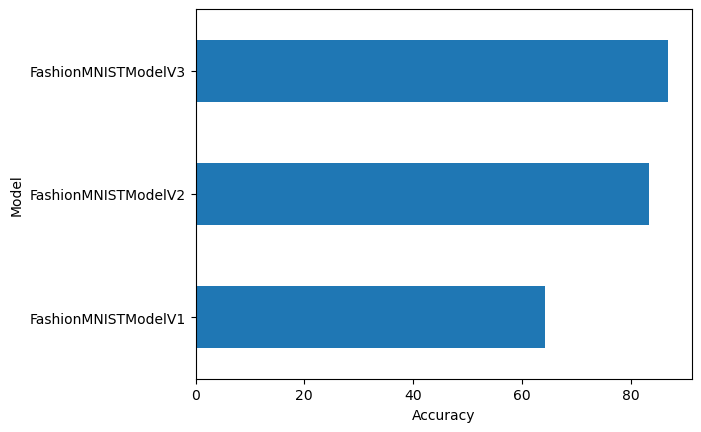

In [49]:
compare_results.set_index('model_name')['model_accuracy'].plot(kind='barh')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

In [50]:
#make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [57]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

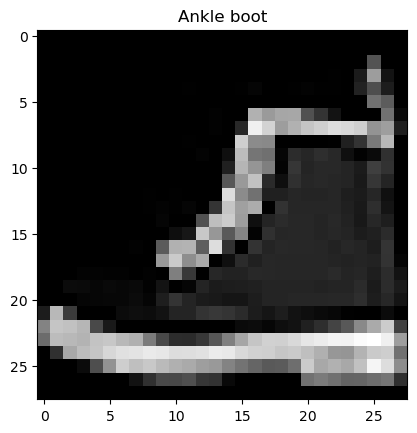

In [58]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [59]:
pred_probs = make_predictions(model=model_1, data=test_samples)

pred_probs[:2]

tensor([[4.2046e-08, 2.4871e-09, 8.6719e-10, 9.3176e-08, 1.9107e-07, 4.1453e-03,
         4.9946e-08, 3.8576e-06, 1.3713e-03, 9.9448e-01],
        [3.0684e-06, 5.4319e-10, 7.1698e-06, 3.4259e-07, 4.1752e-06, 8.4659e-03,
         8.9332e-07, 9.3470e-01, 1.8946e-03, 5.4920e-02]])

In [60]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [61]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

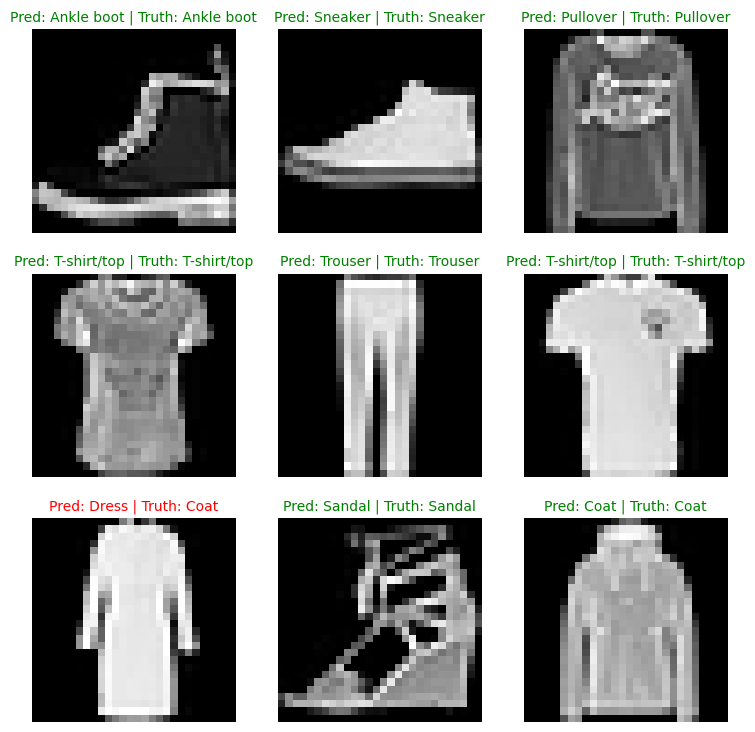

In [62]:
#plot predictions

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r') 
    
    plt.axis(False)